In [1]:
# The code was removed by DSX for sharing.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [75]:
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE

In [80]:
X_raw = data.iloc[:, 0:-1]
y_raw = data.iloc[:, -1]

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.3, random_state=0)

In [81]:
# over sampling
sm = SMOTE(random_state=0)
X_train_raw, y_train = sm.fit_sample(X_train_raw, y_train)

### Single Decision Tree

In [91]:
tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
tree.fit(X_train_raw, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [92]:
model = SelectFromModel(tree, prefit=True)
X_train = model.transform(X_train_raw)
X_test = model.transform(X_test_raw)

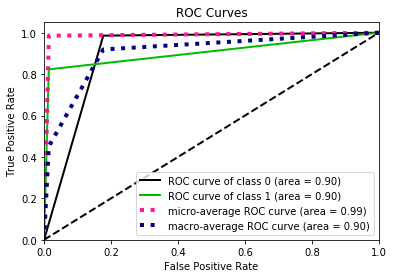

In [94]:
tree2 = DecisionTreeClassifier(random_state=0)
tree2.fit(X_train, y_train)
y_hat = tree2.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, y_hat)
plt.show()

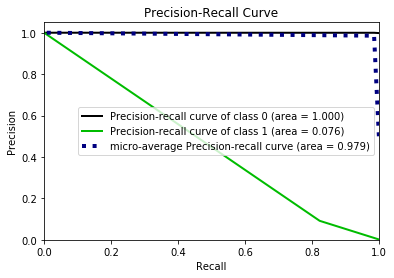

In [95]:
skplt.metrics.plot_precision_recall_curve(y_test, y_hat)
plt.show()

### Adaptive Boost

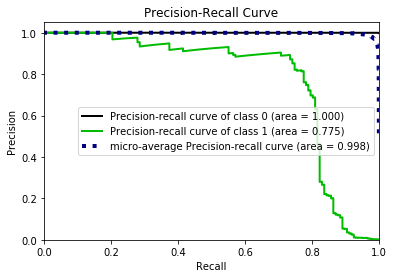

In [96]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, random_state=0), n_estimators=300, random_state=0)
ada.fit(X_train, y_train)
y_hat = ada.predict_proba(X_test)

skplt.metrics.plot_precision_recall_curve(y_test, y_hat)
plt.show()

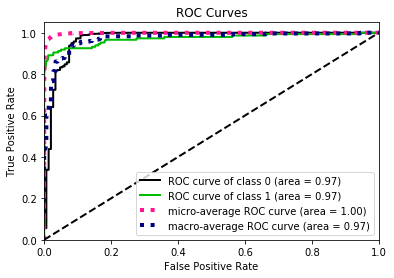

In [98]:
skplt.metrics.plot_roc_curve(y_test, y_hat)
plt.show()

In [99]:
y_hat_01 = np.where(y_hat[:,1] > 0.51, 1, 0)
confusion_matrix(y_test, y_hat_01)

array([[85283,    13],
       [   39,   108]])

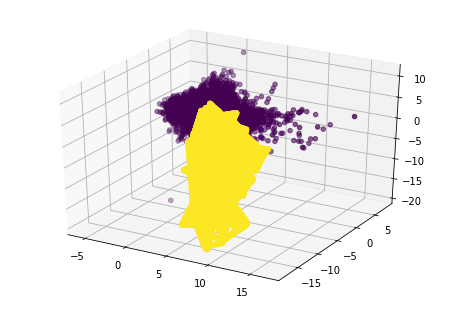

In [104]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c = y_train)

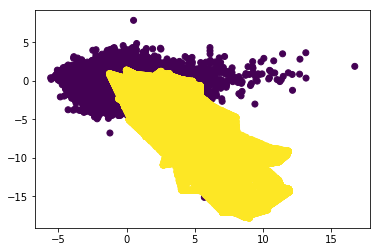

In [105]:
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)

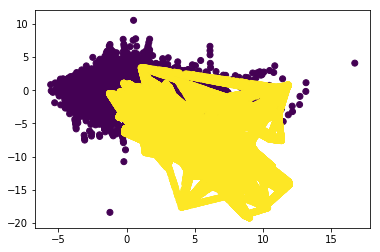

In [106]:
plt.scatter(X_train[:,0], X_train[:,2], c = y_train)

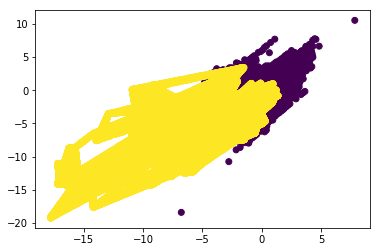

In [107]:
plt.scatter(X_train[:,1], X_train[:,2], c = y_train)